# Trabalho em grupo

Instruções importantes:

* Façam uma cópia deste notebook e **enviem o link** dele preenchido respondido no sistema.
* O trabalho é para ser feito em grupo de 3 a 5 pessoas
* Todas as respostas devem apresentar o código que foi utilizado. Com excessão da pergunta 10 que deve ser respondida por texto
* A resposta deve ser contida no espaço abaixo da pergunta a que se refere e a cima das perguntas seguintes. **Organização importa**
* Só uma pessoa do grupo deve enviar o trabalho e ao fazer isso listar quem são os integrantes do grupo.
* Prazo para o trabalho está no sistema
* Qualquer dúvida estou a disposição :D

## Primeiro passo

Baixe o dataset com o comando a baixo

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

--2025-03-21 17:12:23--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291.58K  --.-KB/s    in 0.02s   

2025-03-21 17:12:23 (11.4 MB/s) - ‘laptops.csv’ saved [298573/298573]



## Pergunta 1

Qual a versão do pandas utilizada?

In [2]:
#Primeiro precisamos importar o Pandas
import pandas as pd

#Verificação de Versão
print(pd.__version__)


2.2.2


## Pergunta 2

Como utilizar pandas para importar (ler) o arquivo csv que foi baixado?

In [35]:
#Ppodemos simplesmente colocar o nome do arquivo se ele estiver na mesma Pasta
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv")

#Exibir as primeiras linhas do DataFrame
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


## Pergunta 3

Quantos elementos tem no dataset?

In [13]:
#Existe algumas formas de fazer isso, Geralmente eu ultilizo o "Df.Info" mas pode se ultilizar algumas outras opções como por exemplo "Describe" etc...
print(df.shape)

(2160, 12)


## Pergunta 4

Quantas marcas de laptop existem no dataset?

In [24]:
#Eu poderia puxar apenas o Dataframe para puxar a Coluna "Brand", Mas ultilizando o Unique ele me fala apenas os sem ter repetido
df["Brand"].unique()

array(['Asus', 'Alurin', 'MSI', 'HP', 'Lenovo', 'Medion', 'Acer', 'Apple',
       'Razer', 'Gigabyte', 'Dell', 'LG', 'Samsung', 'PcCom', 'Microsoft',
       'Primux', 'Prixton', 'Dynabook Toshiba', 'Thomson', 'Denver',
       'Deep Gaming', 'Vant', 'Innjoo', 'Jetwing', 'Millenium', 'Realme',
       'Toshiba'], dtype=object)

## Pergunta 5

Quantas colunas no dataset tem valores faltantes (nulos)?

In [27]:
#Chamo o Dataframe ultilizando o Isnull (é nulo) + some quantos Deu
df.isnull().sum()

,0
Laptop,0
Status,0
Brand,0
Model,0
CPU,0
RAM,0
Storage,0
Storage type,42
GPU,1371
Screen,4


## Pergunta 6

Qual o maior preço final dos notebooks da Dell nesse dataset

In [34]:
#Filtrar apenas os notebooks da Dell
dell_notebooks = df[df["Brand"] == "Dell"]

#Encontrar o maior preço
max_preco_dell = dell_notebooks["Final Price"].max()

#Filtrar o(s) notebook(s) com esse preço
notebook_mais_caro = dell_notebooks[dell_notebooks["Final Price"] == max_preco_dell]

#Exibir os detalhes
notebook_mais_caro

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
1335,Dell Precision 5770 Intel Core i7-12700H/16GB/...,New,Dell,Precision,Intel Core i7,16,512,SSD,RTX A2000,17.0,Yes,3936.0


## Pergunta 7

Qual a mediana do tamanho das telas?

In [37]:
#Fazendo o Calculo das Mediana
mediana_tela = df["Screen"].median()

#Chamando a Função
print(f"A mediana do tamanho das telas é: {mediana_tela}")

A mediana do tamanho das telas é: 15.6


## Pergunta 8

Como usar matplotlib para a distribuição dos preços de notebook?

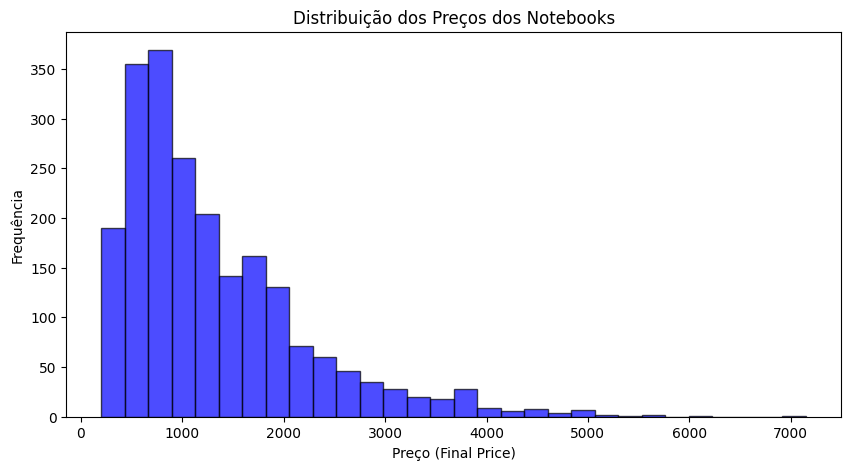

In [39]:
#Assim como o Pandas, precisamos importar o Matplotlib
import matplotlib.pyplot as plt

#Criar o histograma
plt.figure(figsize=(10, 5))
plt.hist(df["Final Price"], bins=30, color="blue", edgecolor="black", alpha=0.7)

#Adicionar títulos e rótulos
plt.title("Distribuição dos Preços dos Notebooks")
plt.xlabel("Preço (Final Price)")
plt.ylabel("Frequência")

#Exibir o gráfico
plt.show()


## Pergunta 9

Como usar matplotlib para ilustrar como os preços variam a depender se o notebook é novo ou não?

<Figure size 800x500 with 0 Axes>

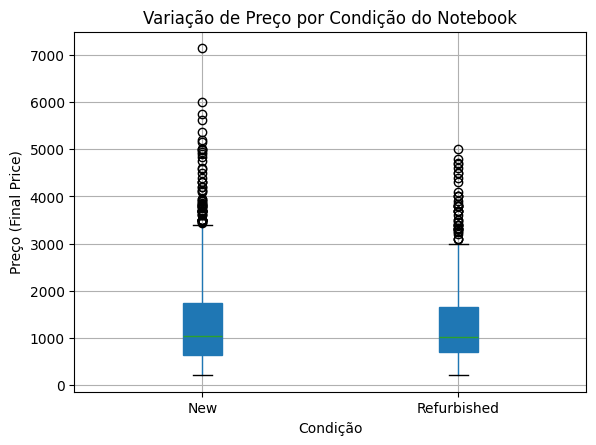

In [53]:
#Criar o boxplot
plt.figure(figsize=(8, 5))
df.boxplot(column="Final Price", by="Status", patch_artist=True)

#Adicionar título e rótulos
plt.title("Variação de Preço por Condição do Notebook")
plt.suptitle("")  # Remove o título automático do Pandas
plt.xlabel("Condição")
plt.ylabel("Preço (Final Price)")

plt.show()

## Pergunta 10

Imagine que você faz parte de uma equipe e deve predizer o preço do notebook com base nos dados que temos no dataset. Responda as seguintes perguntas:



*   Esse seria uma problema de que tipo de aprendizado (supervisionado, não supervisionado ou por reforço)? Por que?
*   Dos algoritmos vistos na aula passada, qual você usaria e por que?
*   Quais colunas você usaria para criar o modelo e por que?



In [ ]:
#1)
''' aprendizado supervisionado, pois temos dados rotulados (o preço do notebook é um valor conhecido no dataset). 
No aprendizado supervisionado, o modelo aprende a partir de exemplos onde as entradas (características do notebook) estão associadas a uma saída conhecida (o preço).'''

#2)
''' Regressão Linear, pois o preço do notebook é uma variável contínua e tem uma relação com as características do notebook.'''

#3) 
'''Queriamos começar com as Colunas que não usariamos porque não fariam impactos no Preço, Elas são "ID" "Serial Number", tambem tem a "Release Date" porem ela acaba sendo relativa...
Dito isso acredito que "Condition" X "GPU" Sejam boas para começar a treinar um modelo porque são duas categorias que o preço pode ter diversas variações e depois entrar com "Processor".'''